- 참조: https://wikidocs.net/31698



In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# DTM (Document Term Matrix)
- `DTM`: 문서(Document)별의 단어(Term) 출현 빈도수(TF)를 가로 세로의 행열(matrix) 단위로 표시한 자료
- `TF` (Term Frequency): 어떤 단어가 특정 문서에 얼마나 많이 쓰였는지의 횟수

(정리)
- `TF` : 문서에서 단어가 몇번 나타났는지 행열로 표시 
- `DT` : `TF`의 데이터를 T/F로 변환하여 행열로 표시 
 - 0: False / 1 이상: True 

## [Part1] DTM 제작원리 이해
- Part1은 DTM 알고리즘의 이해를 위한 작업임
- 이자료 가장 하단의 Part2 에 간단한 계산식 있음


### [Part 1-1] (단어필드제작- 문장의 토큰화)
- 단어의 정규화등 많은 작업이 필요하나 여기서는 작업의 편의성을 - 위해 빈칸단위로 분리한 자료로 사용함.
- 토큰화는 기존의 워드클라우드 작업과 동일함.

In [ ]:
# 코드의 편의성을 위해서 txt자료는 빈칸단위로 분리할수 있는 자료로 준비했습니다.
txt=['파이썬 차트 파이썬 머신러닝',
      '차트 파이썬 R 차트',
       'R 분석 시각화'
      ]

In [ ]:
# 날코딩 방법
##  [방법1] 빈칸단위로 나누기

txtList=[] # 최종결과 

for x in txt:
    list_=[]
    
    for j in x.split(): # 기본: 공백으로 나눠줌 
        list_.append(j)

    txtList.append(list_)

txtList

[['파이썬', '차트', '파이썬', '머신러닝'], ['차트', '파이썬', 'R', '차트'], ['R', '분석', '시각화']]

In [ ]:
# [방법 1-2]
txtList=[] # 최종결과 

for x in txt:
    txtList.append(x.split())

txtList

[['파이썬', '차트', '파이썬', '머신러닝'], ['차트', '파이썬', 'R', '차트'], ['R', '분석', '시각화']]

In [ ]:
##  [방법2] 데이터 나누기 컴프리헨션

tmp = [x.split(' ') for x in txt] # 한줄쓰기
tmp

[['파이썬', '차트', '파이썬', '머신러닝'], ['차트', '파이썬', 'R', '차트'], ['R', '분석', '시각화']]

### [Part 1-2] (단어필드제작- 단어 1차원 자료로 변경)
- 중복단어를 제거하여 고유값 추출 및 열 이름(필드) 생성

In [ ]:
## [방법1] 
dataList=[]
for i in txtList:
    for j in i:
        dataList.append(j)
dataList

['파이썬', '차트', '파이썬', '머신러닝', '차트', '파이썬', 'R', '차트', 'R', '분석', '시각화']

In [ ]:
## [방법2] 2차원 리스트 1차원 결합 컴프리헨션

tmpList = [x for row in tmp for x in row] 
tmpList

['파이썬', '차트', '파이썬', '머신러닝', '차트', '파이썬', 'R', '차트', 'R', '분석', '시각화']

In [ ]:
## [방법3] 'numpy'를 이용하여서 한개의 리스트로 제작가능
import numpy as np
np.concatenate(np.array(tmp))

array(['파이썬', '차트', '파이썬', '머신러닝', '차트', '파이썬', 'R', '차트', 'R', '분석',
       '시각화'], dtype='<U4')

### [Part 1-3] (단어필드제작- 단어 unique)

In [ ]:
##  [방법1] 중복제거, 이 작업은 중복제거 되지만 'sort'는 되지 않음.
uniqueList=[] 

for i in dataList:        # 'dataList'에서 토큰(단어) 하나 가져오기
    cnt=1                 #  
    for j in uniqueList:
        if i==j:
            cnt+=1
    if cnt==1:
        uniqueList.append(i)
uniqueList

['파이썬', '차트', '머신러닝', 'R', '분석', '시각화']

In [ ]:
## [방법 2]
uniqueList=[] 

for i in dataList:             # 'dataList'에서 토큰(단어) 하나 가져오기
      if i not in uniqueList:  # 생성한 리스트에 포함되어있지 않으면 
          uniqueList.append(i) # 생성한 리스트에 넣어주기
uniqueList

['파이썬', '차트', '머신러닝', 'R', '분석', '시각화']

In [ ]:
## [방법 3]
uniqueList=[i for i in dataList if i not in uniqueList ] 
uniqueList
#=> 한줄쓰기 안됨!! -> 비교 대상 X

[]

In [ ]:
## [방법 3] numpy - 중복제거
# np.unique() 구글검색 해보기!!!!! 
uniqueList = np.unique(dataList)
uniqueList

array(['R', '머신러닝', '분석', '시각화', '차트', '파이썬'], dtype='<U4')

In [ ]:
# 리스트로 변환하고자 할 경우 (적용 X)
np.unique(dataList).tolist()

['R', '머신러닝', '분석', '시각화', '차트', '파이썬']

### [Part 1-4] (단어필드제작- 단어 필드작성)
- `uniqueList` 를 이용

In [ ]:
import pandas as pd

# 단어필드 작성을 위해서는 아래의 두개 자료가 필요함.
print('대상 문자열: ', txtList)    # 최초 데이터 (row)
print('필드명: ',uniqueList) # 유니크값 (중복X) (col)

대상 문자열:  [['파이썬', '차트', '파이썬', '머신러닝'], ['차트', '파이썬', 'R', '차트'], ['R', '분석', '시각화']]
필드명:  ['R' '머신러닝' '분석' '시각화' '차트' '파이썬']


### [Part 1-5] (DTM: 단어별 count)

In [ ]:
 # 리스트의 처음값 'R'로 보기
 # 열 
col = uniqueList[0]  # 'R'       
print('▶ 검색단어==> %s'%col) # %s: 이건 텍스트다 ㅎㅎ 
# 1번행에서만 확인하기
# 행 
row = txtList[0]  # 원본의 첫번째 자료에대한 
print('▶ 검색대상 1행 ==> %s'%row)

cnt=0
for item in row: 
    if col == item:
        cnt=cnt+1

print('▶▶▶ 검색단어: %s   검색된횟수: %d' %(col,cnt))

▶ 검색단어==> R
▶ 검색대상 1행 ==> ['파이썬', '차트', '파이썬', '머신러닝']
▶▶▶ 검색단어: R   검색된횟수: 0


In [ ]:
### -- DTM 계산
### 컬럼자료의 출현횟수를 계산함.
### [방법1] 직접작성
### 위의 코드를 다중 for로 완성
result=[]

for col in uniqueList:   # 리스트의처음값 'R'로 보기
    list_=[]

    for row in txtList:      #1번행에서 확인
        cnt=0
        for item in row:
            if col==item:
                cnt=cnt+1
        # print('------------------------------')
        #print('검색단어: %s   검색된횟수: %d' %(col,cnt))
        
        list_.append(cnt) # 검색 횟수

    result.append(list_) # 최종 결과 
print(result)

# DataFrame 구조로 확인
df = pd.DataFrame(result)
print(df)
print('--------------------------')
# 행열 reverse
df=df.T
print(df)
# 필드명 지정
df.columns = uniqueList
df

[[0, 1, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 2, 0], [2, 1, 0]]
   0  1  2
0  0  1  1
1  1  0  0
2  0  0  1
3  0  0  1
4  1  2  0
5  2  1  0
--------------------------
   0  1  2  3  4  5
0  0  1  0  0  1  2
1  1  0  0  0  2  1
2  1  0  1  1  0  0


,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


In [ ]:
### 참고: 장바구니분석(연관분석)에 사용하는 자료는 자료의 출현여부만 확인함.
### [방법1] 직접작성

result=[]
for data in txtList: 
    list_=['True'  if x in data  else 'False' for x in uniqueList] # if-else 같이 사용하면 for문은 맨 뒤로!
    result.append(list_)
result 

pd.DataFrame(result,columns=uniqueList)

,R,머신러닝,분석,시각화,차트,파이썬
0,False,True,False,False,True,True
1,True,False,False,False,True,True
2,True,False,True,True,False,False


In [ ]:
### 참고: 장바구니분석(연관분석)에 사용하는 자료는 자료의 출현여부만 확인함.
### [방법2] transactionEncoder 모듈 사용

# TransactionEncoder 모듈 
from mlxtend.preprocessing import TransactionEncoder
# 학습 시작 
te = TransactionEncoder()
te.fit(txtList)       # .fit() : 실제 실행시켜줌 
# 출력
print(te.columns_)    # 중복제거한 컬러명 출력

print('--------------------------------------------')

# 학습 시작 
te_ary = te.fit(txtList).transform(txtList)
print(te_ary)
# DataFrame 
df = pd.DataFrame(te_ary, columns=te.columns_)
df

['R', '머신러닝', '분석', '시각화', '차트', '파이썬']
--------------------------------------------
[[False  True False False  True  True]
 [ True False False False  True  True]
 [ True False  True  True False False]]


,R,머신러닝,분석,시각화,차트,파이썬
0,False,True,False,False,True,True
1,True,False,False,False,True,True
2,True,False,True,True,False,False


## [Part2] DTM 제작간단히code
- https://wikidocs.net/31698
- 위의 위키문서는 텍스트분석에 대하여 아주 잘 서술된 자료입니다. 
- 이 자료를 기반으로 2번에서 TF-IDF를 제작하여 보겠습니다.

In [ ]:
## 데이터에서 고유 단어 필드 추출
txt=['파이썬 차트 파이썬 머신러닝',
      '차트 파이썬 R 차트',
       'R 분석 시각화'
      ]

vocab = list(set(w for doc in  txt for w in doc.split())) 
print(vocab)

vocab.sort() # 정렬 
print(vocab)

# w - 리스트 형식
# set(): 리스트 형식의 고유데이터 뽑아줌

['파이썬', '시각화', '머신러닝', '차트', '분석', 'R']
['R', '머신러닝', '분석', '시각화', '차트', '파이썬']


In [ ]:
def tf(t, d):
  return d.count(t)

In [ ]:
result = []
N=len(txt)
 # 각 문서에 대해서 아래 명령을 수행
for i in range(N): # range(N) = 3
    result.append([])

    d = txt[i] # 문장 순서 
    for j in range(len(vocab)): # 고유값 길이
        t = vocab[j]        
        result[-1].append(tf(t, d))    # 함수사용 O
        #result[-1].append(d.count(t)) # 함수사용 X

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


# TF-IDF 
- `TF`(Term Frequency) : 특정 단어가 하나의 데이터 안에서 등장하는 횟수
- `DF`(Document Frequency) : 특정 단어가 여러 데이터에 자주 등장하는지를 알려주는 지표.
- `IDF`(Inverse Document Frequency) : DF에 역수를 취해(inverse) 구함
- `TF-IDF` : TF와 IDF를 곱한 값. 즉 TF가 높고, DF가 낮을수록 값이 커지는 것을 이용하는 것, 
 - 여러 문서에 골고루 나오면 값이 낮고 몇개의 특정 문서에 집중적으로 많이 나오면 값이 높음 

## 문서내에서의 단어중요도등을 다루는 TF-IDF에 대한 process의 이해
아래와 같이 작업하지 않아도 사이킷런에서 제공하는 TfidfVectorizer 모듈로 계산가능함.



## [Part1] DTM 작성 및 TF 확인
1. 텍스트 분석 - DTM 알고리즘의 이해_문서내의 단어빈도수 계산 에서 DTM 제작이 된후 작업 연결임

In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해 (** 구글에서 math 라이브러리 검색!!)

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split())) # 리스트 
# set(): 고윳값 가져오기
# 1번 for: 문장 단위 가져오기 / 2번 for: 한 문장 공백 단위로 자르기
vocab.sort()

In [5]:
len(vocab)

9

In [7]:
def tf(t, d):
    return d.count(t)

In [8]:
N = len(docs) # N: 광역변수 /len(docs)= 4
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i] # i번쨰 문장
    for j in range(len(vocab)):    # 9
        t = vocab[j]               # i번째 고윳값 단어
        result[-1].append(tf(t, d))# 

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [9]:
result

[[0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 0, 1, 0, 0],
 [0, 1, 1, 0, 2, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 1]]

## [Part2-1] TF-IDF 계산 (IDF 계산)
- 출처: https://wikidocs.net/31698
- `tf(d,t)` : 특정 문서 d에서의 특정 단어 t의 등장 횟수
- `df(t)` : 특정 단어 t가 등장한 문서의 수
- `idf(d, t)` : df(t)에 반비례하는 수
- `idf(d, t) = log(n/1+df(t))`

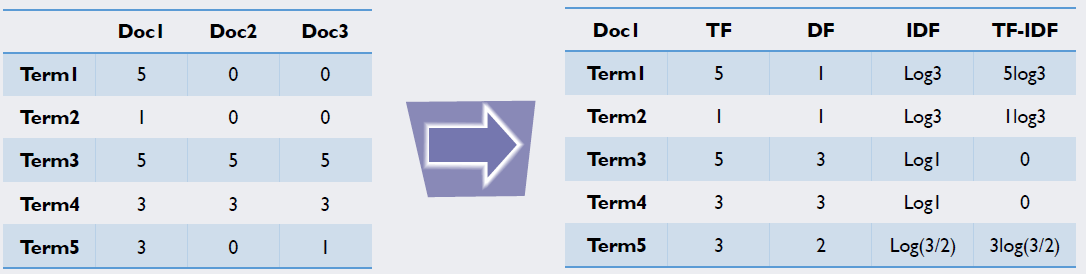

- 위의 그래프에서 가장 영향력 있는 단어는 'Term1'

In [14]:
print(docs)
print(vocab)

['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


In [10]:
# 역빈도수 계산 함수
def idf(t):
    df = 0
    for doc in docs:       # df
        df += t in doc     # t(i번째 고윳값 단어)가 doc 안에 있으면 df에 더해줌 
    return log(N/(df + 1)) # N = len(docs)

In [11]:
# 역빈도수(IDF)
result = []               # 전체 문서에서 단어의 출현 빈도 (T/F)
for j in range(len(vocab)):
    t = vocab[j]          # i번째 고윳값 단어
    result.append(idf(t)) # 위에 함수로 올라가서

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


## [Part2-2] TF-IDF 계산

In [17]:
def tfidf(t, d):
    return tf(t,d)* idf(t)
# tf(t,d) = d.count(): 빈도수 계산 

In [18]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d)) # 맨 뒤에 차곡차곡 넣어줘라!

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


## [Part3] 사이킷런 모듈을 이용한 TF-IDF 계산
- 출처: https://wikidocs.net/31698 의 3. 사이킷런을 이용한 DTM과 TF-IDF 실습 참조
- 사이킷런 계산식은 일반 TF-IDF와 조금 달라서 계산결과가 위의 계산식과 똑같지 않음.

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer # 속성의 텍스트값 

corpus = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]

#tv = TfidfVectorizer().fit(corpus)
tv = TfidfVectorizer()
tv.fit(corpus) # 학습

print(tv.transform(corpus)) # 피팅된(학습된) 결과물 가져와 내부적으로 여러 작업 가능하게 해줌 
# (i번째 문장, 단어 위치?)

  (0, 6)	0.5264054336099155
  (0, 5)	0.6676785446095399
  (0, 3)	0.5264054336099155
  (1, 6)	0.5773502691896257
  (1, 4)	0.5773502691896257
  (1, 3)	0.5773502691896257
  (2, 4)	0.7444497035180324
  (2, 2)	0.47212002654617047
  (2, 1)	0.47212002654617047
  (3, 8)	0.5773502691896257
  (3, 7)	0.5773502691896257
  (3, 0)	0.5773502691896257


In [23]:
print(tv.transform(corpus).toarray()) # 피팅된(학습된) 결과물 가져와 내부적으로 여러 작업 가능하게 해줌 
print()
print(tv.vocabulary_)  # 알파벳 오름차순으로 인덱스가 부여됨/ 인덱스로 위치값 알려줌

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]

{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


## 사이킷런 패키지 자세하게 작업해보기

In [28]:
## 3번파일에서 사이킷런 패키지 자세하게  작업합니다.
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [

  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]
tfidfv = TfidfVectorizer().fit(corpus)
tfidfv

TfidfVectorizer()

In [31]:
tfidfv.transform(corpus)  # 4행9열의 메트릭스 자료이며 numpy 자료임을 표시함. (문장 4개, 단어 9개)

# 4X9  sparse matrix  : 4행 9열의 빈값이 많은 행열임
#  '<class 'numpy.float64'>' : 배열자료구조임  

#    -  type(tfidfv.transform(corpus))   실행해봄  


# with 12 stored elements in Compressed Sparse Row format  : 12개만 0값이 아님. 
# -> 가로세로 36개중 불필요한 0값을 제외하고 압축 희소 행 형식으로 저장된 12개 요소만 포함한 자료값이라는 뜻

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [30]:
type(tfidfv.transform(corpus))
# 주로 numpy or scipy 에서 생성됨

scipy.sparse.csr.csr_matrix

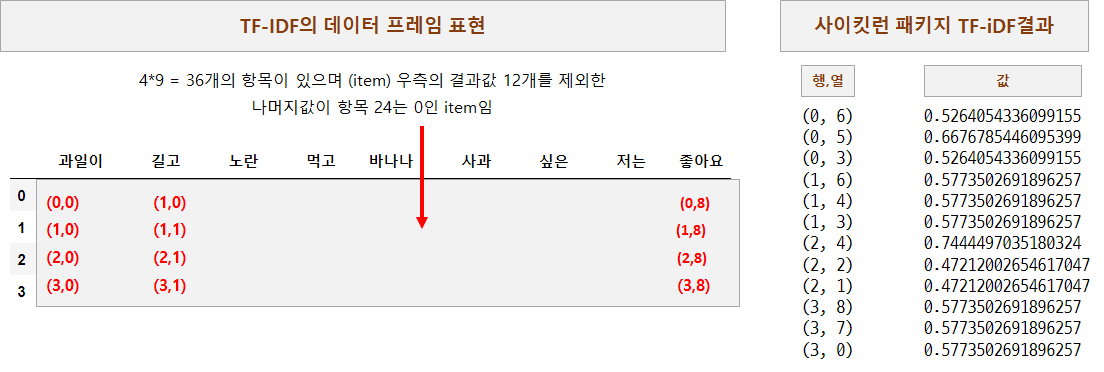

- 위의 TF-IDF 데이터 프레임 표시 잘못됨ㅎㅎ

In [34]:
print(tfidfv.transform(corpus)) # 결과값 확인 위해 print()
print()
tfidfv.transform(corpus)

  (0, 6)	0.5264054336099155
  (0, 5)	0.6676785446095399
  (0, 3)	0.5264054336099155
  (1, 6)	0.5773502691896257
  (1, 4)	0.5773502691896257
  (1, 3)	0.5773502691896257
  (2, 4)	0.7444497035180324
  (2, 2)	0.47212002654617047
  (2, 1)	0.47212002654617047
  (3, 8)	0.5773502691896257
  (3, 7)	0.5773502691896257
  (3, 0)	0.5773502691896257



<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [35]:
# 결과값을 numpy의 배열구조로 변경해 출력
print(tfidfv.transform(corpus).toarray()) 

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]


In [37]:
# 열(단어)이름 가져오기 (.get_feature_names())
features = tfidfv.get_feature_names()
features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [39]:
# 다음과 같이 데이터프레임으로도 변환가능함.
tmp = tfidfv.transform(corpus).toarray()

import pandas as pd

pd.DataFrame(tmp,columns=features)

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [41]:
# 단어: 단어를 오름차순으로 했을때의 순서번호
# 딥러닝에서도 단어분석시에 다음과 같이 딕셔너리의 형식으로 단어와 인덱스 번호를 갖게 됩니다.
# 인덱스 번호는 사용하는 패키지에 따라 방법으로 부여함. (오름차순 또는 출현횟수순등.)

print(tfidfv.vocabulary_ )
print(type(tfidfv.vocabulary_ ))

{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}
<class 'dict'>


In [42]:
# (.items())
print(tfidfv.vocabulary_.items()) # 튜플 구조 -> (인덱스, 위치값) 

print(type(tfidfv.vocabulary_.items()))

dict_items([('먹고', 3), ('싶은', 6), ('사과', 5), ('바나나', 4), ('길고', 1), ('노란', 2), ('저는', 7), ('과일이', 0), ('좋아요', 8)])
<class 'dict_items'>


In [43]:
# 순서번호 오름차순으로 정렬함.
sorted(tfidfv.vocabulary_.items()) # 위치값으로 정렬

[('과일이', 0),
 ('길고', 1),
 ('노란', 2),
 ('먹고', 3),
 ('바나나', 4),
 ('사과', 5),
 ('싶은', 6),
 ('저는', 7),
 ('좋아요', 8)]

### min-df는 DF(document-frequency)의 최소 빈도값을 설정해주는 파라미터

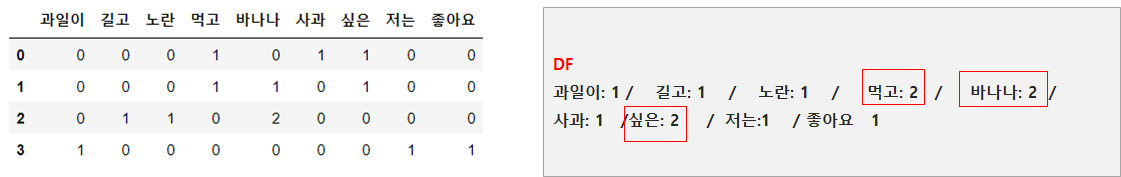

In [45]:
min_df_vectorizer = TfidfVectorizer(min_df = 2)   # df값(문장 출현 횟수)이 2 이상인 자료만 보여줌
# TfidfVectorizer(): 최소값, 최대값, 평균 등 다양한 데이터들 있음 
min_df_vectorizer.fit(corpus)  # 학습

print(sorted(min_df_vectorizer.vocabulary_.items())) # vectorizer가 학습한 단어 사전을 정렬해 출력
print('----------------------------------------')

print(min_df_vectorizer.transform(corpus))
 # (0, 2) -> 0번째 문장 - '싶은'

[('먹고', 0), ('바나나', 1), ('싶은', 2)]
----------------------------------------
  (0, 2)	0.7071067811865475
  (0, 0)	0.7071067811865475
  (1, 2)	0.5773502691896257
  (1, 1)	0.5773502691896257
  (1, 0)	0.5773502691896257
  (2, 1)	1.0


### analyzer 학습단위를 결정하는 파라미터
- `analyzer = 'word'`라고 설정시, 학습의 단위를 단어로 설정합니다. (ex - home, go, my ...) 
- `analyzer = 'char'`라고 설정시, 학습의 단위를 글자로 설정합니다.(ex - a, b, c, d ...)

In [50]:
# analyzer = 'word' : 한 단어씩 뽑아서 출력
analyzer_vectorizer = TfidfVectorizer(analyzer = 'word')   # df값(문장 출현 횟수)이 2 이상인 자료만 보여줌
analyzer_vectorizer.fit(corpus)  # 학습

print(sorted(analyzer_vectorizer.vocabulary_.items())) # vectorizer가 학습한 단어 사전을 정렬해 출력
print('----------------------------------------')

print(analyzer_vectorizer.transform(corpus))

[('과일이', 0), ('길고', 1), ('노란', 2), ('먹고', 3), ('바나나', 4), ('사과', 5), ('싶은', 6), ('저는', 7), ('좋아요', 8)]
----------------------------------------
  (0, 6)	0.5264054336099155
  (0, 5)	0.6676785446095399
  (0, 3)	0.5264054336099155
  (1, 6)	0.5773502691896257
  (1, 4)	0.5773502691896257
  (1, 3)	0.5773502691896257
  (2, 4)	0.7444497035180324
  (2, 2)	0.47212002654617047
  (2, 1)	0.47212002654617047
  (3, 8)	0.5773502691896257
  (3, 7)	0.5773502691896257
  (3, 0)	0.5773502691896257


In [51]:
# analyzer = 'char' : 한 글자씩 뽑아서 출력
analyzer_vectorizer = TfidfVectorizer(analyzer = 'char')   # df값(문장 출현 횟수)이 2 이상인 자료만 보여줌
analyzer_vectorizer.fit(corpus)  # 학습

print(sorted(analyzer_vectorizer.vocabulary_.items())) # vectorizer가 학습한 단어 사전을 정렬해 출력
print('----------------------------------------')

print(analyzer_vectorizer.transform(corpus))

[(' ', 0), ('고', 1), ('과', 2), ('길', 3), ('나', 4), ('노', 5), ('는', 6), ('란', 7), ('먹', 8), ('바', 9), ('사', 10), ('싶', 11), ('아', 12), ('요', 13), ('은', 14), ('이', 15), ('일', 16), ('저', 17), ('좋', 18)]
----------------------------------------
  (0, 14)	0.35318731294444045
  (0, 11)	0.35318731294444045
  (0, 10)	0.44797332250951943
  (0, 8)	0.35318731294444045
  (0, 2)	0.35318731294444045
  (0, 1)	0.2859355688958699
  (0, 0)	0.4675421271503998
  (1, 14)	0.3099702920660165
  (1, 11)	0.3099702920660165
  (1, 9)	0.3099702920660165
  (1, 8)	0.3099702920660165
  (1, 4)	0.619940584132033
  (1, 1)	0.2509476658824886
  (1, 0)	0.41033232054055674
  (2, 9)	0.3687011865017588
  (2, 7)	0.23382535198309534
  (2, 5)	0.23382535198309534
  (2, 4)	0.7374023730035176
  (2, 3)	0.23382535198309534
  (2, 1)	0.1492476932934832
  (2, 0)	0.3660593062845084
  (3, 18)	0.33882021467710843
  (3, 17)	0.33882021467710843
  (3, 16)	0.33882021467710843
  (3, 15)	0.33882021467710843
  (3, 13)	0.33882021467710843
  (3, 12

- 참고: https://velog.io/@arittung/DeepLearningStudyDay8

In [78]:
# '확률적 경사하강법(Grandient Descent)'을 이용한 '문장 유사도' 구하기
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [

  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
   
]
tfidfv = TfidfVectorizer().fit(corpus) # 단어 학습

X=tfidfv.fit_transform(corpus)
y=[1,2,3,4]

model=SGDClassifier(loss='perceptron')

model.fit(X,y) # 재학습

newX = tfidfv.transform(['사과가 좋아요','좋은 과일은']) # transform -> 테스트를 거치는 것, 쪼개기
pred=model.predict(newX)
pred    
# '사과가 좋아요'는 4번문장 '저는 과일이 좋아요'와 유사
# '좋은 과일은'은  4번문장과 유사함을 표시함.

array([4, 2])

In [65]:
newX = tfidfv.transform(['나는 바나나를 정말 좋아해요']) # transform -> 테스트를 거치는 것, 쪼개기
pred=model.predict(newX)
pred   

array([4])

In [69]:
newX = tfidfv.transform(['사과 먹고 싶다']) # transform -> 테스트를 거치는 것, 쪼개기
pred=model.predict(newX)
pred   

array([1])